<a href="https://colab.research.google.com/github/lanaradmilovic/OpenAISqliteProject/blob/main/Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Northwind database**

The Northwind database is a fictional sample database frequently used for learning and demonstration purposes. It represents a simplified model of a company that sells various products to customers and manages its supply chain operations. At its core, Northwind is a comprehensive database designed to simulate the functionalities of a real-world business, providing insights into inventory management, order processing, customer relationships, and employee management.

In this database, tables such as Customers, Employees, and Suppliers represent key stakeholders in the company's ecosystem. The Orders table tracks the details of customer orders, including order dates, shipping information, and order statuses. Product-related information, such as product names, categories, and pricing, is stored in the Products and Categories tables, facilitating efficient inventory management.

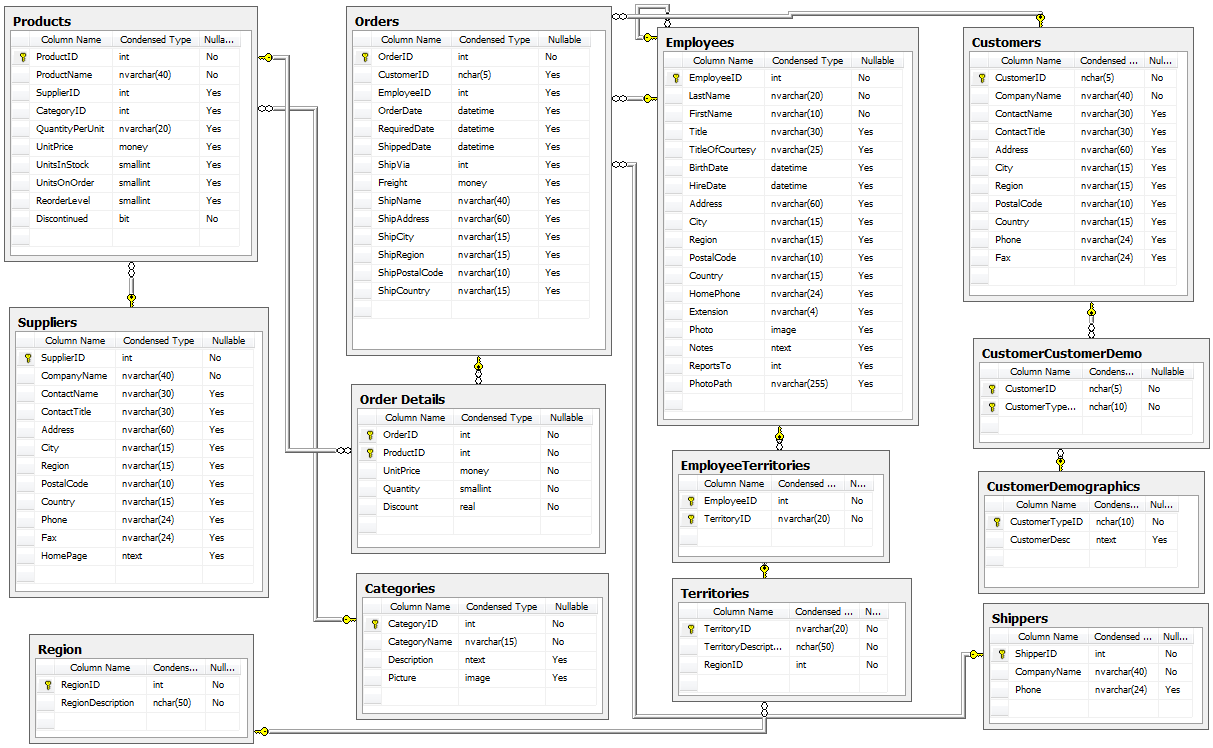

# **Unveiling the Journey: A Concise Overview**


As we embark on our journey through the typical scenarios encountered in any company, we'll navigate the intricate process of hiring, negotiating with clients, processing new orders, and even promoting employees. Our first step involves establishing a connection to the Northwind database using SQLite and preparing our tools—Chan and Agent—for the tasks ahead.

We'll start by outlining the various use cases we'll encounter along the way, each representing a different aspect of our business operations. From there, we'll set our predefined chains and agents in motion to execute queries seamlessly, all based on natural language input.

As we delve deeper into our work, we'll uncover recurring patterns and scenarios where our chains prove effective in executing queries and providing accurate responses. Conversely, we'll also encounter situations where the expertise of our agents becomes indispensable in achieving the desired outcomes.

### Cycle of Success: The Journey of Recruitment, Expansion, and Client Satisfaction

In the world of finding the right person for the job, it's like searching for a rare treasure in a vast sea. After a long process of choosing, our HR team found our perfect fit: Mr. Michael Jones, the ideal candidate to be our new sales representative. With his great skills and qualities, we happily welcomed him into our company and added him to our database as our newest employee.

We decided to expand our business to Bedford, UK, and Mike was the perfect choice to manage that area. With his knowledge and enthusiasm, he took on the role, ready to grow our company and reach new customers.

At the same time, our important client, B's Beverages, needed to restock their shelves. They trusted us to give them a list of drinks from our collection, so we carefully selected the best options for them.

To meet their request for 100 units of each product, we checked our stock levels. While most items were fine, a few were low. We quickly ordered more to make sure we had everything our clients needed.

When it was time to choose a shipping company for the orders, we picked the one that had the least amount of work. This made sure the deliveries would be fast and smooth.

But there's more! As a thank you to B's Beverages for their loyalty, we gave them a 10% discount on their order. This made both parties happy and strengthened our relationship.

Looking to the future, we thought about expanding to Birmingham, UK. Michael was perfect for leading this new venture, so we promoted him to sales manager. He took on the role eagerly, ready to lead our company to even greater success.

And so, our story continues, with each step forward marking a new achievement in our journey. With dedication and hard work, we keep moving forward, guided by our commitment to excellence and making our clients happy.

# **Setup**

In [ ]:
%pip install --upgrade --quiet  langchain langchain-community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


 To continue with the next steps, save the Chinook_Sqlite.sql script in the designated files section. Here's script: [Northwind_Sqlite.sql](https://github.com/jpwhite3/northwind-SQLite3/blob/main/src/create.sql)

Just a quick tip: when saving the create.sql file, rename it to Northwind_Sqlite.sql to seamlessly incorporate the additional code.

In [ ]:
import sqlite3

conn = sqlite3.connect("Northwind.db")

cursor = conn.cursor()

with open("Northwind_Sqlite.sql", "r") as sql_file:
    sql_commands = sql_file.read()
    cursor.executescript(sql_commands)

cursor.execute("SELECT * FROM Regions;")
result = cursor.fetchall()

print(result)

[(1, 'Eastern'), (2, 'Western'), (3, 'Northern'), (4, 'Southern')]


In [ ]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Northwind.db")

print(db.dialect)

print(db.get_usable_table_names())

db.run("SELECT * FROM Shippers;")

sqlite
['Categories', 'CustomerCustomerDemo', 'CustomerDemographics', 'Customers', 'EmployeeTerritories', 'Employees', 'Order Details', 'Orders', 'Products', 'Regions', 'Shippers', 'Suppliers', 'Territories']


"[(1, 'Speedy Express', '(503) 555-9831'), (2, 'United Package', '(503) 555-3199'), (3, 'Federal Shipping', '(503) 555-9931')]"

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

## Many Tables

One of the main pieces of information we need to include in our prompt is the schemas of the relevant tables. When dealing with a large number of tables, it becomes impractical to include all the schemas in a single prompt. In such situations, the approach involves initially extracting the names of tables associated with the user input and subsequently including only their respective schemas.

In [ ]:
from langchain.chains.openai_tools import create_extraction_chain_pydantic
from langchain_core.pydantic_v1 import BaseModel, Field

class Table(BaseModel):
    name: str = Field(description="Name of table in SQL database.")

In [ ]:
system = """Given the SQL tables:

- Customer
- Product
- Order
- Employee

Return ONLY the names of the relevant table categories for the user question, excluding the ones not relevant.
It is fine to return only one category if needed."""
category_chain = create_extraction_chain_pydantic(Table, llm, system_message=system)

In [ ]:
from typing import List

# Define a function to get relevant tables based on categories
def get_tables(categories: List[Table]) -> List[str]:
    tables = []

    for category in categories:
        if category.name == "Customer":
            tables.extend(
                [
                    "Customers",
                    "CustomerCustomerDemo",
                    "CustomerDemographics",
                ]
            )
        elif category.name == "Product":
            tables.extend(["Products", "Suppliers", "Categories"])
        elif category.name == "Order":
            tables.extend(["Orders", "Order Details", "Shippers"])
        elif category.name == "Employee":
            tables.extend(["Employees", "Territories", "EmployeeTerritories", "Regions"])

    return tables

table_chain = category_chain | get_tables

In [ ]:
table_chain.invoke({"input": "How many employees come from London?"})

['Employees', 'Territories', 'EmployeeTerritories', 'Regions']

Now we have a chain capable of generating the necessary tables for any query.

In [ ]:
from operator import itemgetter

table_chain = {"input": itemgetter("question")} | table_chain

## Dynamic few-shot examples

Incorporating examples where natural language questions are transformed into valid SQL queries against our database within the prompt can frequently enhance the model's effectiveness, particularly for intricate queries. However, when dealing with a sufficient number of examples, we might opt to include only the most pertinent ones in the prompt. This decision could be driven by factors such as constraints on the model's context window or a desire to avoid distracting the model with an extensive range of examples. More specifically, for any given input, our goal is to include the examples that are most relevant to that particular input.

In [ ]:
examples = [
    {"input": "List all products.", "query": "SELECT * FROM Products;"},
    {
        "input": "Find all orders placed in the year 2023.",
        "query": "SELECT * FROM Orders WHERE YEAR(OrderDate) = 2023;",
    },
    {
        "input": "Show all employee territories for employee 'Davolio Nancy'.",
        "query": """SELECT *
            FROM EmployeeTerritories AS ET
            JOIN Employees AS E ON ET.EmployeeID = E.EmployeeID
            JOIN Territories AS T ON ET.TerritoryID = T.TerritoryID
            WHERE E.LastName = 'Davolio' AND E.FirstName = 'Nancy';
        """
    },
    {
        "input": "To set a discount of 20 percent for the product named 'Chai' in the order with ID 1.",
        "query": """UPDATE OrderDetails
          SET Discount = 0.2
          WHERE OrderID = 1
          AND ProductID = (SELECT ProductID FROM Products WHERE ProductName = 'Chai');
        """
    },
    {
        "input": "What are the names and contact titles of customers from France who have placed orders?",
        "query": """
            SELECT c.CompanyName, c.ContactTitle
            FROM Customers c
            INNER JOIN Orders o ON c.CustomerID = o.CustomerID
            WHERE c.Country = 'France';
        """,
    },
    {
        "input": "Find the total number of units sold for each product in the year 2022.",
        "query": """
            SELECT p.ProductName, SUM(od.Quantity) AS TotalUnitsSold
            FROM Products p
            INNER JOIN OrderDetails od ON p.ProductID = od.ProductID
            INNER JOIN Orders o ON od.OrderID = o.OrderID
            WHERE YEAR(o.OrderDate) = 2022
            GROUP BY p.ProductID;
        """,
    },
    {
        "input": "List all employees and their corresponding departments.",
        "query": """
            SELECT e.FirstName + ' ' + e.LastName AS EmployeeName, d.DepartmentName
            FROM Employees e
            INNER JOIN Departments d ON e.DepartmentID = d.DepartmentID;
        """,
    },
    {
        "input": "Find the total number of orders placed by each employee in the year 1997.",
        "query": """
            SELECT e.FirstName + ' ' + e.LastName AS EmployeeName, COUNT(*) AS OrderCount
            FROM Orders o
            INNER JOIN Employees e ON o.EmployeeID = e.EmployeeID
            WHERE YEAR(OrderDate) = 1997
            GROUP BY e.EmployeeID;
        """,
    },
    {
        "input": "List the names of discontinued products with a unit price greater than $10.",
        "query": "SELECT ProductName, UnitPrice FROM Products WHERE Discontinued = 1 AND UnitPrice > 10;",
    },
    {
        "input": "What are the top 5 most expensive products based on unit price?",
        "query": "SELECT ProductName, UnitPrice FROM Products ORDER BY UnitPrice DESC LIMIT 5;",
    },
    {
        "input": "How many employees are there?",
        "query": "SELECT COUNT(*) FROM Employees;",
    },
    {
        "input": "Add a new category for organic products.",
        "query": "INSERT INTO Categories (CategoryName, Description) VALUES ('Organic', 'Products made from organic ingredients.');",
    },
    {
        "input": "Increase the prices of all beverages by 10%.",
        "query": "UPDATE Products SET UnitPrice = UnitPrice * 1.1 WHERE CategoryID = 1;",
    },
    {
        "input": "Employ a new sales representative named Alice Thompson.",
        "query": "INSERT INTO Employees (LastName, FirstName, Title) VALUES ('Thompson', 'Alice', 'Sales Representative');",
    },
    {
        "input": "Assign the territory 'London' to the sales manager John Doe.",
        "query": "UPDATE Employees SET TerritoryID = (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'London') WHERE LastName = 'Doe' AND FirstName = 'John';",
    },
    {
        "input": "Remove all orders placed by a customer called ALFKI.",
        "query": "DELETE FROM Orders WHERE CustomerID = 'ALFKI';",
    }
]

In [ ]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 36.1 MB/s eta 0:00:00


In [ ]:
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.3 MB/s eta 0:00:00


In [ ]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

example_prompt = PromptTemplate.from_template("User input: {input}\nSQL query: {query}")

We can achieve this using an ExampleSelector. Specifically, we will employ a SemanticSimilarityExampleSelector, which stores examples in the vector database of our preference. During runtime, it conducts a similarity search between the input and our examples, returning the most semantically similar ones.

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_core.example_selectors import SemanticSimilarityExampleSelector
from langchain_openai import OpenAIEmbeddings

example_selector = SemanticSimilarityExampleSelector.from_examples(
    examples,
    OpenAIEmbeddings(),
    FAISS,
    k=5,
    input_keys=["input"],
)

In [ ]:
example_selector.select_examples({"input": "How many products belong to 'Beverage' category?"})

[{'input': 'List all products.', 'query': 'SELECT * FROM Products;'},
 {'input': 'Increase the prices of all beverages by 10%.',
  'query': 'UPDATE Products SET UnitPrice = UnitPrice * 1.1 WHERE CategoryID = 1;'},
 {'input': 'What are the top 5 most expensive products based on unit price?',
  'query': 'SELECT ProductName, UnitPrice FROM Products ORDER BY UnitPrice DESC LIMIT 5;'},
 {'input': 'Add a new category for organic products.',
  'query': "INSERT INTO Categories (CategoryName, Description) VALUES ('Organic', 'Products made from organic ingredients.');"},
 {'input': 'How many employees are there?',
  'query': 'SELECT COUNT(*) FROM Employees;'}]

In [ ]:
prompt = FewShotPromptTemplate(
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="You are a SQLite expert. Given an input question, create a syntactically correct SQLite query to run. Make DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database that are required from user. Unless otherwise specified, do not return more than {top_k} rows.\n\nHere are the relevant table names: {table_info}\n\nBelow are a number of examples of questions and their corresponding SQL queries.",
    suffix="User input: {input}\nSQL query: ",
    input_variables=["input", "top_k", "table_info"],
)

In [ ]:
user_input = "How many employees come from London?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
print(tbl_names)

['Employees', 'Territories', 'EmployeeTerritories', 'Regions']


In [ ]:
print(prompt.format(input=user_input, top_k=3, table_info=tbl_names))

You are a SQLite expert. Given an input question, create a syntactically correct SQLite query to run. Make DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database that are required from user. Unless otherwise specified, do not return more than 3 rows.

Here are the relevant table names: ['Employees', 'Territories', 'EmployeeTerritories', 'Regions']

Below are a number of examples of questions and their corresponding SQL queries.

User input: How many employees are there?
SQL query: SELECT COUNT(*) FROM Employees;

User input: Assign the territory 'London' to the sales manager John Doe.
SQL query: UPDATE Employees SET TerritoryID = (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'London') WHERE LastName = 'Doe' AND FirstName = 'John';

User input: List all employees and their corresponding departments.
SQL query: 
            SELECT e.FirstName + ' ' + e.LastName AS EmployeeName, d.DepartmentName
            FROM Employees e
            INNER JOIN Department

In [ ]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool
from langchain.chains import create_sql_query_chain

write_query = create_sql_query_chain(llm, db, prompt)
execute_query = QuerySQLDataBaseTool(db=db)

## Answer The Question
Now that we have a method for automatically generating and executing queries, the next step is to integrate the original question with the SQL query result to produce a conclusive answer. This can be achieved by once again feeding both the question and the result into the language model.

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

answer_prompt = PromptTemplate.from_template(
    """Given the following user question, corresponding SQL query, and SQL result, answer the user question.

Question: {question}
SQL Query: {query}
SQL Result: {result}
Answer: """
)

answer = answer_prompt | llm | StrOutputParser()
chain_final_answer = (
    RunnablePassthrough.assign(query=write_query).assign(
        result=itemgetter("query") | execute_query
    )
    | answer
)

In [ ]:
full_chain_answer = RunnablePassthrough.assign(table_names_to_use=table_chain) | chain_final_answer
full_chain_answer.invoke({"question": "How many employees come from London?", "top_k": 3, "table_info": tbl_info})

'There are 4 employees who come from London.'

# **Use Case Diagram**

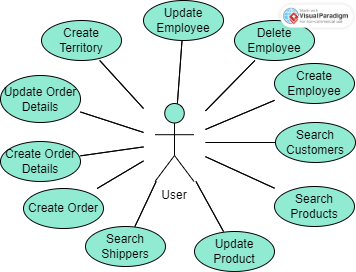

## **Delete Employee**: Anne Dodsworth's Resignation

In London, Anne Dodsworth, a Sales Representative, has opted to resign from her role. After receiving an attractive offer from another company, Anne has decided to move on, despite her current employer offering improved conditions and a potential promotion. Consequently, the company is now faced with the task of terminating Anne's contract and removing her information from their system.

In [ ]:
write_query.invoke({"question": "Remove employee which first name is 'Ann' and last name is 'Dodsworth'."})

"DELETE FROM Employees WHERE FirstName = 'Ann' AND LastName = 'Dodsworth';"

In [ ]:
write_query.invoke({"question": "Employee called Anne Dodsworth has left the company."})

"DELETE FROM Employees WHERE LastName = 'Dodsworth' AND FirstName = 'Anne';"

The SQL query returned for both prompts is identical. This consistency is maintained regardless of whether the query is formulated using SQL statements or natural language expressions, ensuring reliability and accuracy in query generation.

In [ ]:
user_input = "What is employee Anne Dodsworth's job?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"Employee Anne Dodsworth's job is a Sales Representative."

In [ ]:
user_input = "Employee called Anne Dodsworth has left the company."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The employee named Anne Dodsworth has been successfully removed from the Employees table in the database.'

In [ ]:
user_input = "Show employee called Anne Dodsworth."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The SQL query did not return any results for an employee named Anne Dodsworth.'

## **Create Employee**: Bring a Fresh Staff Member On Board

After Anne, who hails from London, resigned from her Sales Representative position, the company initiated the recruitment process to find a suitable replacement. After thorough selection procedures, Michael Jones emerged as the perfect candidate for the role. He will commence his duties in London, occupying the vacant position. It is imperative to store all necessary information about Michael in the database system to ensure seamless integration into the company's operations.

In [ ]:
write_query.invoke({"question": """Mr. Michael Jones emerges as an ideal candidate for the position of sales representative.
Born on December 5, 1970, he resides at 122 Alexander Square in Chelsea, London, UK, with the postal code 02150.
His home phone number is (71) 555-7773, extension '465'. He currently has no reporting supervisor and does not require a photo at this time. He is just hired in the company."""})

"INSERT INTO Employees (LastName, FirstName, Title, BirthDate, Address, City, Region, PostalCode, Country, HomePhone, Extension, ReportsTo)\nVALUES ('Jones', 'Michael', 'Sales Representative', '1970-12-05', '122 Alexander Square', 'Chelsea', 'London', '02150', 'UK', '(71) 555-7773', '465', NULL);"

In [ ]:
user_input = """Mr. Michael Jones emerges as an ideal candidate for the position of sales representative.
Born on December 5, 1970, he resides at 122 Alexander Square in Chelsea, London, UK, with the postal code 02150.
His home phone number is (71) 555-7773, extension '465'. He currently has no reporting supervisor and does not require a photo at this time. He is just hired in the company."""
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"Mr. Michael Jones has been successfully added to the company's database as a Sales Representative."

In [ ]:
user_input = "Retrieve stored information about employee Michael Jones."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The stored information about employee Michael Jones is as follows:\n- EmployeeID: 10\n- LastName: Jones\n- FirstName: Michael\n- Title: Sales Representative\n- TitleOfCourtesy: None\n- BirthDate: 1970-12-05\n- HireDate: None\n- Address: 122 Alexander Square\n- City: Chelsea\n- Region: None\n- PostalCode: 02150\n- Country: UK\n- HomePhone: (71) 555-7773\n- Extension: 465\n- Photo: None\n- Notes: None\n- ReportsTo: None\n- PhotoPath: None'

In [ ]:
write_query.invoke({"question": "Insert employee territory of Michael Jones as Bedford."})

"INSERT INTO EmployeeTerritories (EmployeeID, TerritoryID) \n            VALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael'), \n            (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bedford'));"

In [ ]:
user_input = "Insert employee territory of Michael Jones as Bedford."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The employee territory of Michael Jones has been successfully inserted as Bedford.'

In [ ]:
write_query.invoke({"question": "What is employee territory for Michael Jones?"})

"SELECT T.TerritoryDescription\n            FROM EmployeeTerritories AS ET\n            JOIN Employees AS E ON ET.EmployeeID = E.EmployeeID\n            JOIN Territories AS T ON ET.TerritoryID = T.TerritoryID\n            WHERE E.LastName = 'Jones' AND E.FirstName = 'Michael';"

In [ ]:
user_input = "What is employee territory for Michael Jones?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k":3, "table_info": tbl_names})

'The employee territory for Michael Jones is Bedford.'

Just for curiosity's sake, we will introduce ***agents***. Agents excel in handling tasks that require adaptability, decision-making, and dynamic behavior, making them the ideal choice for navigating such scenarios. Considering the unpredictable nature of human questions, "they" are a perfect choice.

## Using a dynamic few-shot prompt

In [ ]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
)

system_prefix = """You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most {top_k} results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the given tools. Only use the information returned by the tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

Make DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database that are required from user.

If the question does not seem related to the database, just return "I don't know" as the answer.

Here are some examples of user inputs and their corresponding SQL queries:"""

few_shot_prompt = FewShotPromptTemplate(
    example_selector=example_selector,
    example_prompt=PromptTemplate.from_template(
        "User input: {input}\nSQL query: {query}"
    ),
    input_variables=["input", "dialect", "top_k"],
    prefix=system_prefix,
    suffix="",
)

In [ ]:
full_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate(prompt=few_shot_prompt),
        ("human", "{input}"),
        MessagesPlaceholder("agent_scratchpad"),
    ]
)

In [ ]:
# Example formatted prompt
prompt_val = full_prompt.invoke(
    {
        "input": "How many products are there",
        "top_k": 5,
        "dialect": "SQLite",
        "agent_scratchpad": [],
    }
)
print(prompt_val.to_string())

System: You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct SQLite query to run, then look at the results of the query and return the answer.
Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.
You have access to tools for interacting with the database.
Only use the given tools. Only use the information returned by the tools to construct your final answer.
You MUST double check your query before executing it. If you get an error while executing a query, rewrite the query and try again.

Make DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database that are required from user.

If the question does not seem related to the database, just

## Dealing with high-cardinality columns

In [ ]:
import ast
import re

def query_as_list(db, query):
    res = db.run(query)
    res = [el for sub in ast.literal_eval(res) for el in sub if el]
    res = [re.sub(r"\b\d+\b", "", string).strip() for string in res]
    return res

In [ ]:
# Define the tables and columns for each query
tables_columns = [
    ("Orders", "ShipAddress"),
    ("Suppliers", "ContactName, CompanyName, Address"),
    ("Customers", "CompanyName, Address"),
    ("Shippers", "CompanyName"),
    ("Products", "ProductName"),
    ("Categories", "CategoryName"),
    ("Employees", "FirstName, LastName, Address"),
]
proper_nouns = []
for table, columns in tables_columns:
    proper_nouns += query_as_list(db, f"SELECT {columns} FROM {table}")

In [ ]:
from langchain.agents.agent_toolkits import create_retriever_tool

# Converting textual data into numerical vectors for similarity-based retrieval
vector_db = FAISS.from_texts(proper_nouns, OpenAIEmbeddings())

retriever = vector_db.as_retriever(search_kwargs={"k": 5})

description = """Use to look up values to filter on. Input is an approximate spelling of the proper noun, output is \
valid proper nouns. Use the noun most similar to the search."""

retriever_tool = create_retriever_tool(
    retriever,
    name="search_proper_nouns",
    description=description,
)

In [ ]:
from langchain_community.agent_toolkits import create_sql_agent

agent_executor = create_sql_agent(
    llm=llm,
    db=db,
    extra_tools=[retriever_tool],
    prompt=full_prompt,
    agent_type="openai-tools",
    verbose=True,
)

This agent is designed to interact with a SQL database, capable of generating syntactically correct SQL queries based on user input. It utilizes a few-shot prompt template, which includes examples of user inputs and their corresponding SQL queries, to guide its understanding. Additionally, it incorporates a proper noun retriever tool to assist in filtering relevant information from the database. Overall, it aims to provide accurate responses to user queries while adhering to specified constraints and guidelines.

We will now dare agents to do the same job for the same prompts to observe if their processing and interpretation of prompts differ from chains.
We'll just need to add new Employee and then for him to insert EmployeeTerritories because of UNIQUE constraint failure.

In [ ]:
agent_executor.invoke("Insert employee territory of Michael Jones as Bedford.")



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_query` with `{'query': "INSERT INTO EmployeeTerritories (EmployeeID, TerritoryID) VALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael'), (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bedford'))"}`


Error: (sqlite3.IntegrityError) UNIQUE constraint failed: EmployeeTerritories.EmployeeID, EmployeeTerritories.TerritoryID
[SQL: INSERT INTO EmployeeTerritories (EmployeeID, TerritoryID) VALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael'), (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bedford'))]
(Background on this error at: https://sqlalche.me/e/20/gkpj)It seems that there was an error due to a unique constraint violation. It appears that the territory 'Bedford' is already assigned to Michael Jones.

> Finished chain.


{'input': 'Insert employee territory of Michael Jones as Bedford.',
 'output': "It seems that there was an error due to a unique constraint violation. It appears that the territory 'Bedford' is already assigned to Michael Jones."}

We simply have to create a new employee record and assign them to territories in the EmployeeTerritories table. Encountering a UNIQUE constraint violation is actually beneficial because it indicates that both the employee and their assigned territory are successfully persisted in the database.

In [ ]:
agent_executor.invoke("Insert a new employee named Maria Nile and insert employee territory for Maria Nile as Bedford.")



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_query` with `{'query': "INSERT INTO Employees (LastName, FirstName) VALUES ('Nile', 'Maria');"}`



Invoking: `sql_db_query` with `{'query': "INSERT INTO EmployeeTerritories (EmployeeID, TerritoryID) VALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Nile' AND FirstName = 'Maria'), (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bedford'));"}`


Employee Maria Nile has been successfully added, and the territory Bedford has been assigned to her.

> Finished chain.


{'input': 'Insert a new employee named Maria Nile and insert employee territory for Maria Nile as Bedford.',
 'output': 'Employee Maria Nile has been successfully added, and the territory Bedford has been assigned to her.'}

We can already observe some benefits of agents: Firstly, it's crucial to note its embedded exception handling mechanism. The SQL Agent adeptly manages errors by executing a generated query, capturing the traceback, and accurately regenerating it. Secondly, it possesses the ability to execute multiple queries simultaneously.

Let's challenge the chain to execute multiple statements at a time!

In [ ]:
write_query.invoke({"question": "Insert a new employee named Maria Nile and insert employee territory for Maria Nile as Bedford."})

"INSERT INTO Employees (LastName, FirstName, Title)\nVALUES ('Nile', 'Maria', 'Sales Representative');\n\nINSERT INTO EmployeeTerritories (EmployeeID, TerritoryID)\nVALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Nile' AND FirstName = 'Maria'), \n        (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bedford'));"

In [ ]:
user_input = "Insert a new employee named Maria Nile and insert employee territory for Maria Nile as Bedford."

tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question":user_input, "top_k": 3, "table_info": tbl_names})

Warning: You can only execute one statement at a time.

As observed, chains are not capable of executing multiple statements simultaneously.

## **Select Customer**: Access Details for B's Beverages

Let's go, Michael Jones! It's time to showcase your skills. The company has scheduled a meeting with our valued customer, B's Beverages, at 2 p.m. This presents a fantastic opportunity for Michael to demonstrate his expertise. As part of his preparation for the meeting, Michael should thoroughly review all the customer information stored in our system.

In [ ]:
write_query.invoke({"question": "Show me customer whose name is Bs Beverages."})

"SELECT * FROM Customers WHERE CompanyName = 'Bs Beverages';"

In [ ]:
user_input = "Show me customer whose name is Bs Beverages."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question":user_input, "top_k": 3, "table_info": tbl_names})

'The SQL query did not return any results for a customer with the name "Bs Beverages." It is possible that there is no customer in the database with that exact name. You may want to double-check the spelling or try a different search criteria.'

We encountered an issue when attempting to filter companies based on their names. The system does not recognize differences in uppercase and lowercase letters, nor does it handle apostrophes accurately. Accurate spelling is vital for precise data filtering. One approach to address this is by creating a vector store containing all unique proper nouns in the database. Then, we can query this vector store with each user input, incorporating the most relevant proper nouns into the prompt.

In [ ]:
from operator import itemgetter

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

system = """You are a SQLite expert. Given an input question, create a syntactically \
correct SQLite query to run. Do not use triple backticks (```) directly to denote a SQL code block when generating SQL query as answer. Unless otherwise specificed, do not return more than \
{top_k} rows.\n\nHere is the relevant table info: {table_info}\n\nHere is a non-exhaustive \
list of possible feature values. If filtering on a feature value make sure to check its spelling \
against this list first:\n\n{proper_nouns}"""

prompt = ChatPromptTemplate.from_messages([("system", system), ("human", "{input}")])

query_chain_hc = create_sql_query_chain(llm, db, prompt=prompt)
retriever_chain = (
    itemgetter("question")
    | retriever
    | (lambda docs: "\n".join(doc.page_content for doc in docs))
)
chain_hc = RunnablePassthrough.assign(proper_nouns=retriever_chain) | query_chain_hc

In [ ]:
# f_a = chain_ch | answer  ?????????????????????????????????

In [ ]:
q = chain_hc.invoke({"question": "Show me customer whose name is Bs Beverages."})
print(q)

SELECT * 
FROM Customers 
WHERE CompanyName = "B's Beverages";


In [ ]:
db.run(q)

'[(\'BSBEV\', "B\'s Beverages", \'Victoria Ashworth\', \'Sales Representative\', \'Fauntleroy Circus\', \'London\', None, \'EC2 5NT\', \'UK\', \'(171) 555-1212\', None)]'

## **Select Products**: Beverage Product Inquiry

The meeting is underway, and Victoria Ashworth, the company representative, is solely focused on beverages, as expected. She requests information on all products classified as beverages.

In [ ]:
write_query.invoke({"question": "Retrieve all beverages."})

'SELECT * FROM Products WHERE CategoryID = 1;'

In [ ]:
user_input = "Retrieve names for all beverages."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The names of all beverages in the database are: Chai, Chang, Guaraná Fantástica, Sasquatch Ale, Steeleye Stout, Côte de Blaye, Chartreuse verte, Ipoh Coffee, Laughing Lumberjack Lager, Outback Lager, Rhönbräu Klosterbier, and Lakkalikööri.'


The model chain exhibits remarkable intuition. It accurately deduced our discussion about the product's beverage category, even though I didn't specifically mention products.

## **Select Products**: Selecting Products and Pricing

It's no surprise that Victoria is the sales representative for B's Beverages. She quickly decided on the products they're interested in: Sasquatch Ale and Ipoh Coffee. Thanks to Michael's persuasive skills, she also agreed to order Chai and Chang.
She's only interested in prices, so we'll provide her with a pricing list for each product.

In [ ]:
write_query.invoke({"question": "Show prices for next products: Sasquatch Ale, Ipoh Coffee, Chai and Chang"})

"SELECT ProductName, UnitPrice FROM Products WHERE ProductName IN ('Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang');"

In [ ]:
user_input = "Show prices for next products: Sasquatch Ale, Ipoh Coffee, Chai and Chang."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The prices for the next products are as follows:\n- Sasquatch Ale: $14\n- Ipoh Coffee: $46\n- Chai: $18\n- Chang: $19'

## **Update Products**: Handling Victoria's Bulk Order Request

Victoria's visits are rare, but when she does come, she places substantial orders! She's requesting 100 units of each product. Michael's first task is to verify if there are enough products in stock. If not, he'll need to place orders for additional products. Initially, he'll update the current status of units on order and then notify the respective supplier about our requirements.

In [ ]:
write_query.invoke({"question": "Show number of units in stock and units on order for each product: Sasquatch Ale, Ipoh Coffee, Chai and Chang"})

"SELECT ProductName, UnitsInStock, UnitsOnOrder\nFROM Products\nWHERE ProductName IN ('Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang');"

In [ ]:
user_input = "Show number of units in stock and units on order for each product: Sasquatch Ale, Ipoh Coffee, Chai and Chang"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'- Sasquatch Ale: 111 units in stock, 0 units on order\n- Ipoh Coffee: 17 units in stock, 10 units on order\n- Chai: 39 units in stock, 0 units on order\n- Chang: 17 units in stock, 40 units on order'

In [ ]:
write_query.invoke({"question": """We need to provide 100 units (in stock and on order) of each product.
If summary of number of units both in stock and on order is less than 100, update unit on order value to make summary of 100 with units in stock.
Products: 'Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang'"""})

"UPDATE Products\nSET UnitsOnOrder = CASE \n                        WHEN (UnitsInStock + UnitsOnOrder) < 100 THEN 100 - UnitsInStock\n                        ELSE UnitsOnOrder\n                    END\nWHERE ProductName IN ('Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang');"

In [ ]:
user_input = """We need to provide 100 units (in stock and on order) of each product.
If summary of number of units both in stock and on order is less than 100, update unit on order value to make summary of 100 with units in stock.
Products: 'Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang'. Update values of units on order where needed."""
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"The SQL query provided will update the UnitsOnOrder values for the products 'Sasquatch Ale', 'Ipoh Coffee', 'Chai', and 'Chang' to ensure that the total number of units (in stock and on order) for each product is at least 100. If the sum of UnitsInStock and UnitsOnOrder is less than 100 for a product, the UnitsOnOrder value will be adjusted to make the total 100.\n\nAfter running the SQL query, the UnitsOnOrder values for each product will be updated accordingly to meet the requirement of having at least 100 units (in stock and on order) for each product."

In [ ]:
user_input = "Show number of units in stock and units on order for each product:'Sasquatch Ale', 'Ipoh Coffee', 'Chai', 'Chang'"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"For the products 'Sasquatch Ale', 'Ipoh Coffee', 'Chai', and 'Chang', the number of units in stock and units on order are as follows:\n- Sasquatch Ale: 111 units in stock, 0 units on order\n- Ipoh Coffee: 17 units in stock, 83 units on order\n- Chai: 39 units in stock, 61 units on order\n- Chang: 17 units in stock, 83 units on order"

## **Select Shippers**: Choosing a Shipping Company

We're almost there, just one step away from saving the new order in our database system. All that's left is to select a shipping company. As per our company's policy, we'll choose the one currently with the least number of orders.

In [ ]:
write_query.invoke({"question": "Which shipping company has the fewest number of orders?"})

'SELECT s.CompanyName, COUNT(o.OrderID) AS OrderCount\nFROM Shippers s\nINNER JOIN Orders o ON s.ShipperID = o.ShipVia\nGROUP BY s.ShipperID\nORDER BY OrderCount ASC\nLIMIT 1;'

In [ ]:
user_input = "Which shipping company has the fewest number of orders?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The shipping company with the fewest number of orders is Speedy Express, with a total of 249 orders.'

## **Create Order**: Finalizing Order Processing in the Database System

We are now ready to proceed with accepting the order and storing it in our database system, marking another successful transaction in the books. Finally!

In [ ]:
write_query.invoke({"question": """
Please create a new order with the following information:
Customer: B's Beverages
Assigned Employee: Michael Jones
Order Date: Today's date
Required Date: 14th of April
Shipment Date: 1st of April
Shipping Method: Speedy Express
Freight Cost: $180
Ship Name: Seven Seas Imports
Ship Address: 90 Wadhurst Rd.
City: London
Postal Code: OX15 4NB
Country: UK

For this order create order details for product Chai with unit price of 16, quantity of 100 and without discount.

Please proceed with creating this order."""})

'INSERT INTO Orders (CustomerID, EmployeeID, OrderDate, RequiredDate, ShippedDate, ShipVia, Freight, ShipName, ShipAddress, ShipCity, ShipPostalCode, ShipCountry)\nVALUES ((SELECT CustomerID FROM Customers WHERE CompanyName = "B\'s Beverages"), \n        (SELECT EmployeeID FROM Employees WHERE FirstName = "Michael" AND LastName = "Jones"), \n        DATE(\'now\'), \n        \'2023-04-14\', \n        \'2023-04-01\', \n        (SELECT ShipperID FROM Shippers WHERE CompanyName = "Speedy Express"), \n        180, \n        \'Seven Seas Imports\', \n        \'90 Wadhurst Rd.\', \n        \'London\', \n        \'OX15 4NB\', \n        \'UK\');\n\nINSERT INTO "Order Details" (OrderID, ProductID, UnitPrice, Quantity, Discount)\nVALUES ((SELECT MAX(OrderID) FROM Orders), \n        (SELECT ProductID FROM Products WHERE ProductName = \'Chai\'), \n        16, \n        100, \n        0);'

In [ ]:
user_input = """Please create a new order with the following information:
Customer: B's Beverages
Assigned Employee: Michael Jones
Order Date: Today's date
Required Date: 14th of April
Shipment Date: 1st of April
Shipping Method: Speedy Express
Freight Cost: $180
Ship Name: Seven Seas Imports
Ship Address: 90 Wadhurst Rd.
City: London
Postal Code: OX15 4NB
Country: UK

For this order create order details for product Chai with unit price of 16, quantity of 100 and without discount.

Please proceed with creating this order."""
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

Warning: You can only execute one statement at a time.

Once again, we've encountered the same error caused by attempting to execute multiple statements at the same time.

In [ ]:
user_input = "Show me order registred by Michael Jones for B''s Beverages?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"The query did not return any results, meaning there are no orders registered by Michael Jones for B's Beverages in the database."

In [ ]:
agent_executor.invoke("""Create a new order for the product Sasquatch Ale with the following details:
- Company Name: B's Beverages
- Employee: Michael Jones
- Order Date: Today's date
- Required Date: 14th of April
- Shipment Date: 1st of April
- Shipping Via: Speedy Express

Insert this order into the 'Orders' table and set the unit price to $14. The quantity is 100, and there is no discount. Ensure that both the order and its details are persisted in the database.

""")



> Entering new SQL Agent Executor chain...

Invoking: `search_proper_nouns` with `{'query': 'Sasquatch Ale'}`


Sasquatch Ale

Bigfoot Breweries

Laughing Lumberjack Lager

Outback Lager

Split Rail Beer & Ale
Invoking: `search_proper_nouns` with `{'query': 'Michael Jones'}`


Jones

Michael Björn

Michael

Michael

Robb Merchant
Invoking: `search_proper_nouns` with `{'query': 'Speedy Express'}`


Speedy Express

QUICK-Stop

United Package

Berglunds snabbköp

Frankenversand
Invoking: `sql_db_query` with `{'query': "INSERT INTO Orders (CustomerID, EmployeeID, OrderDate, RequiredDate, ShippedDate, ShipVia) VALUES ((SELECT CustomerID FROM Customers WHERE CompanyName = 'B''s Beverages'), (SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael'), DATE('now'), '2023-04-14', '2023-04-01', (SELECT ShipperID FROM Shippers WHERE ShipperName = 'Speedy Express'))"}`


Error: (sqlite3.OperationalError) no such column: ShipperName
[SQL: INSERT INTO Orders (CustomerID, 

{'input': "Create a new order for the product Sasquatch Ale with the following details:\n- Company Name: B's Beverages\n- Employee: Michael Jones\n- Order Date: Today's date\n- Required Date: 14th of April\n- Shipment Date: 1st of April\n- Shipping Via: Speedy Express\n\nInsert this order into the 'Orders' table and set the unit price to $14. The quantity is 100, and there is no discount. Ensure that both the order and its details are persisted in the database.\n\n",
 'output': 'The new order for the product Sasquatch Ale has been successfully inserted into the database with the provided details.'}

In [ ]:
user_input = "What is id of order registred by employee Michael Jones for B''s Beverages customer?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"The id of the order registered by employee Michael Jones for B's Beverages customer is 11082."

We'll proceed by generating orders for the remaining three products. Given that the order details remain consistent for each product, we'll treat them collectively as one order. We'll then append different products to the order details for the same order.

In [ ]:
agent_executor.invoke("""
Retrieve the order made by the customer 'B's Beverages' today. Insert this order along with the following products ('Ipoh Coffee', 'Chai', and 'Chang') into the 'Order Details' table.
Set the unit prices retrospectively to 40, 14, and 15. Each product has a quantity of 100, and there are no discounts applied. Execute the queries.
""")



> Entering new SQL Agent Executor chain...

Invoking: `search_proper_nouns` with `{'query': 'Order Details'}`


Order Processing Dept.
 Paul Revere Blvd.

P.O. Box

P.O. Box

P.O. Box

P.O. Box
Invoking: `sql_db_query` with `{'query': "SELECT * FROM Orders o JOIN Customers c ON o.CustomerID = c.CustomerID WHERE c.CompanyName = 'B''s Beverages' AND DATE(o.OrderDate) = DATE('now')"}`


[(11082, 'BSBEV', 10, '2024-03-21', '2023-04-14', '2023-04-01', 1, 0, None, None, None, None, None, None, "B's Beverages", 'Victoria Ashworth', 'Sales Representative', 'Fauntleroy Circus', 'London', None, 'EC2 5NT', 'UK', '(171) 555-1212', None), (11083, 'BSBEV', 10, '2024-03-21', '2023-04-14', '2023-04-01', 1, 0, None, None, None, None, None, None, "B's Beverages", 'Victoria Ashworth', 'Sales Representative', 'Fauntleroy Circus', 'London', None, 'EC2 5NT', 'UK', '(171) 555-1212', None)]
Invoking: `sql_db_query` with `{'query': "SELECT ProductID, ProductName FROM Products WHERE ProductName IN ('Ipoh Coff

{'input': "\nRetrieve the order made by the customer 'B's Beverages' today. Insert this order along with the following products ('Ipoh Coffee', 'Chai', and 'Chang') into the 'Order Details' table.\nSet the unit prices retrospectively to 40, 14, and 15. Each product has a quantity of 100, and there are no discounts applied. Execute the queries.\n",
 'output': "The order made by the customer 'B's Beverages' today has been retrieved and inserted into the 'Order Details' table with the products 'Ipoh Coffee', 'Chai', and 'Chang'. The unit prices have been set to 40, 14, and 15 respectively, each with a quantity of 100 and no discounts applied."}

In [ ]:
user_input = "What is the number of orders with id 11082 that you have stored in order details table?"
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The number of orders with id 11082 that are stored in the order details table is 4.'

# **Update Order Details**: 10% Off Order for B's Beverages

After Victoria's convincing negotiation efforts and considering the substantial quantity of products ordered by B''s Beverages, they were granted a 10 percent discount on their order.

In [ ]:
write_query.invoke({"question": "Update order details assigned to employee Michael Jones for company B''s Beverages to receive a 10% discount."})

'UPDATE "Order Details" \n          SET Discount = 0.1\n          WHERE OrderID IN (SELECT OrderID FROM Orders WHERE EmployeeID = (SELECT EmployeeID FROM Employees WHERE LastName = \'Jones\' AND FirstName = \'Michael\') AND CustomerID = \'B\'\'s Beverages\');'

In [ ]:
user_input = "Update order details assigned to employee Michael Jones for company B''s Beverages to receive a 10% discount."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

"The order details assigned to employee Michael Jones for company B's Beverages have been updated to receive a 10% discount."

## **Create Territory**: Market Expansion

Finally, the order is complete, and both Victoria from B's Beverages and we are delighted with the successful purchase. We've made a substantial profit, and now we're ready to expand our market by opening an office in a new location. And where better than Birmingham, eastern side, UK?

In [ ]:
write_query.invoke({"question": "Insert new territory Birmingham, eastern region."})

"INSERT INTO Territories (TerritoryID, TerritoryDescription, RegionID) VALUES ('BIRMI', 'Birmingham', (SELECT RegionID FROM Regions WHERE RegionDescription = 'Eastern'));"

In [ ]:
user_input = "Insert new territory Birmingham, eastern region."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

'The new territory "Birmingham" has been successfully inserted into the database under the "Eastern" region.'

In [ ]:
full_chain_answer.invoke({"question": "Tell me about territory of Birmingham.", "top_k": 3, "table_info": tbl_info})

"The territory of Birmingham has a TerritoryID of 1 and the TerritoryDescription is also 'Birmingham'."

## **Update Employee**: Promotion Alert

Due to Michael Jones's impressive communication and negotiation skills, he has not only impressed Victoria from B''s Beverages but also his employer. As a result, he has been offered a promotion from sales representative to sales manager, where he will be the main person in charge of the newly opened office in Birmingham.

In [ ]:
write_query.invoke({"question": "Set employee territory for Michael Jones to Bigmingham and promote him to sales manager position. Use EmployeeTerritories table."})

"BEGIN TRANSACTION;\n\nUPDATE Employees \nSET Title = 'Sales Manager' \nWHERE LastName = 'Jones' AND FirstName = 'Michael';\n\nINSERT INTO EmployeeTerritories (EmployeeID, TerritoryID) \nVALUES ((SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael'), \n(SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Birmingham'));\n\nCOMMIT;"

In [ ]:
user_input = "Set employee territory for Michael Jones to Bigmingham and promote him to sales manager position. Use EmployeeTerritories table."
tbl_names = table_chain.invoke({"question": user_input})

In [ ]:
full_chain_answer.invoke({"question": user_input, "top_k": 3, "table_info": tbl_names})

Warning: You can only execute one statement at a time.

In [ ]:
agent_executor.invoke("Set employee territory for Michael Jones to Bigmingham and promote him to sales manager position. Use EmployeeTerritories table.")



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_query` with `{'query': "UPDATE EmployeeTerritories SET TerritoryID = (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bigmingham') WHERE EmployeeID = (SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael');"}`


Error: (sqlite3.IntegrityError) NOT NULL constraint failed: EmployeeTerritories.TerritoryID
[SQL: UPDATE EmployeeTerritories SET TerritoryID = (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Bigmingham') WHERE EmployeeID = (SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)
Invoking: `sql_db_query` with `{'query': "UPDATE EmployeeTerritories SET TerritoryID = (SELECT TerritoryID FROM Territories WHERE TerritoryDescription = 'Birmingham') WHERE EmployeeID = (SELECT EmployeeID FROM Employees WHERE LastName = 'Jones' AND FirstName = 'Michael');"}`
responded

{'input': 'Set employee territory for Michael Jones to Bigmingham and promote him to sales manager position. Use EmployeeTerritories table.',
 'output': 'Employee territory for Michael Jones has been set to Birmingham and he has been promoted to the sales manager position.'}

In [ ]:
agent_executor.invoke("What is current title and employee territory of Michael Jones?")



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_query` with `{'query': "SELECT Title, TerritoryDescription\nFROM Employees\nJOIN EmployeeTerritories ON Employees.EmployeeID = EmployeeTerritories.EmployeeID\nJOIN Territories ON EmployeeTerritories.TerritoryID = Territories.TerritoryID\nWHERE LastName = 'Jones' AND FirstName = 'Michael';"}`


[('Sales Representative', 'Birmingham')]Michael Jones is currently a Sales Representative and his employee territory is Birmingham.

> Finished chain.


{'input': 'What is current title and employee territory of Michael Jones?',
 'output': 'Michael Jones is currently a Sales Representative and his employee territory is Birmingham.'}

# **Chains or Agents?**

The main focus of this essay revolves around a series of steps: translating user input from natural language into an SQL query, executing the query, and presenting the result understandably. Given this explanation and previous observations, employing chains is considered suitable for tasks characterized by clear, sequential steps with a consistent sequence of operations. In such cases, there exists a predefined sequence of SQL operations that must be executed in a specific order. However, considering user interaction, these tasks may require adaptability, decision-making, and dynamic behavior due to the unpredictable nature of human input. Occasionally, user inquiries may involve executing multiple SQL queries, a task that cannot be efficiently handled using chains alone; agents are better suited for this purpose.

 Additionally, the SQL Agent efficiently handles errors, executes queries, captures tracebacks, and regenerates them accurately, making it adept at responding to inquiries requiring multiple interdependent queries. Furthermore, the SQL Agent optimizes token usage by focusing solely on schema information from relevant tables, selecting pertinent tables, adding their schema, and including sample rows in the prompt.

 With agents, we achieve the same outcome as with chains but with fewer lines of code. Nonetheless, chains offer clarity and ease of maintenance to our codebase.